In [40]:
%tensorflow_version 2.x
# import tensorflow as tf and tf.keras
import tensorflow as tf
from tensorflow import keras

# import helping libraries
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data() #split data into train and testing parts

4423680/4422102 [==============================] - 0s 0us/step


having a look at the way data is present

In [6]:
train_image.shape

(60000, 28, 28)

we have a 60,000 images for training as 28x28 pixel images & 10,000 images for testing

In [7]:
train_labels[:10] # looking at 10 labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
train_image[0,23,23] #looking at one pixel 

194

In [10]:
print(train_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [11]:
class_names = ['shirt/top',   'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneakers', 'bag', 'ankel boots']

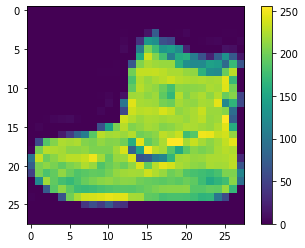

In [12]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()


data preprocesing, last step before we feed the ml with the data. we simply scale the data into values between (0,1) so divide the data by 255 as the pixels can take values 0-255

In [13]:
train_image = train_image / 255.0

test_image = test_image / 255.0

In [14]:
# building the model to run the train images
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #input layer = takes the 28x28 matrix and makes it into a single layer of 784 length
                          keras.layers.Dense(128, activation='relu'), #hidden layer = has 128 neurons, rectify linear unit, maybe sigmoid, tanh
                          keras.layers.Dense(10, activation='softmax'),  #output layer = for 10 classes!
])
# defined the structure of the ml

we get a output of 10 probability distributioin function

In [18]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# actually building the model with these parameters
# also called hyperparamets tuning

In [23]:
model.fit(train_image, train_labels, epochs=1)
# fitting the model to training data = we are training the machine 
# takes more time as input is lot and lot of layers 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1799 - accuracy: 0.9312


In [24]:
# testing on testing data
test_loss, test_acc = model.evaluate(test_image, test_labels, verbose=1)
print('Test accuracy = ',test_acc)

# overfitting occured as the training accuracy > test accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8856
Test accuracy =  0.8855999708175659


In [31]:
predictions = model.predict(test_image) #prediction on every image in test
print(predictions)
# prediction for every of the 10 classes

print(class_names[np.argmax(predictions[0])]) #gives the maximum value in the array predictions[0]

[[1.4922395e-10 6.9105821e-10 4.8109134e-09 ... 5.3982576e-03
  1.5178761e-11 9.9454767e-01]
 [3.4335942e-04 3.5853409e-16 9.9488848e-01 ... 1.0768188e-23
  8.5600594e-14 3.3610075e-15]
 [2.1401825e-11 1.0000000e+00 2.3217184e-16 ... 5.0223839e-27
  1.4421206e-17 1.0338190e-24]
 ...
 [7.1976192e-06 5.6132352e-14 3.5829011e-08 ... 5.8030785e-12
  9.9998701e-01 2.8043699e-17]
 [7.3799730e-11 1.0000000e+00 1.6334216e-15 ... 9.1066333e-16
  3.6136736e-12 8.4419914e-20]
 [7.9172686e-08 1.8198220e-14 1.2943373e-06 ... 4.4824108e-05
  2.5911902e-06 6.0768905e-08]]
ankel boots


trouser


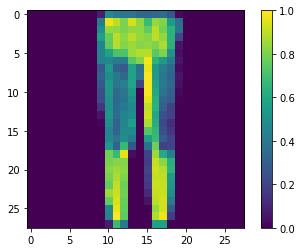

In [34]:
print(class_names[np.argmax(predictions[3])])
plt.figure()
plt.imshow(test_image[3])
plt.colorbar()
plt.grid(False)
plt.show()

  verifications of the prediction
> Indented block




In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


verification of predictions / taken the code from https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/neural-networks-creating-a-model

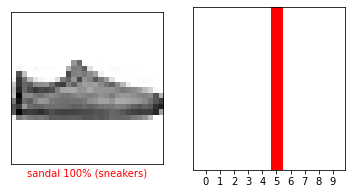

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
